**About Dataset:**

Dataset includes the world's largest collection of used vehicles entry for within the United States.It contains information about the car price, condition, manufacturer, latitude/longitude, and other 18 other categories

Problem Definition:     
Predict the car prices based on features like year, manufacturer, fuel type etc using Linear regression

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**1. Read and Explore Data**

In [35]:
# Load Dataset
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python redi/Project/car-price-predictor-main/vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [36]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [37]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


**2. Data Pre-processing and Cleaning**

Handle missing values, outliers and remove inconsistent or irrelevant entries
Box plots are used to visually summarize the distribution of a dataset and to detect outliers

Maximum Price: 3736928711
Minimum Price: 0


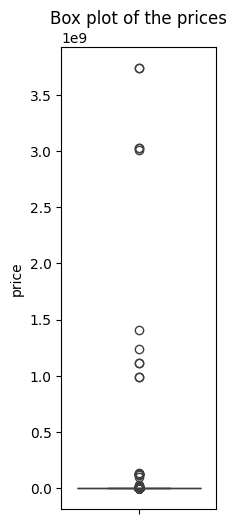

In [38]:
#check for outliers in price
fig, ax = plt.subplots(figsize=(2,6))
ax.set_title('Box plot of the prices')
sns.boxplot(data=df['price'])
# ouliers are there

print("Maximum Price:", df['price'].max())
print("Minimum Price:", df['price'].min())

There are some extremely large prices in the box plot. The common way to remove the outliers is using interquartile range.

In [39]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Plotting the distribution of a car prices
 (i.e To understand different ranges of the car prices ), we use the histogram plot.

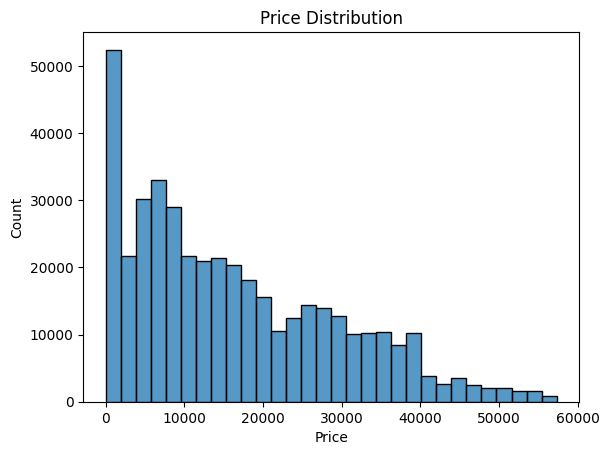

In [40]:
sns.histplot(df['price'], bins=30, kde=False)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

As we can see that there are a large amount of cars with nearly zero price in our dataset. We have to remove them as well.
Set a threshold of 1000

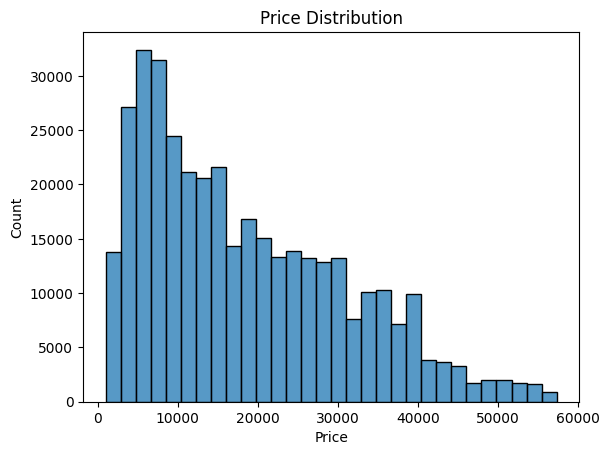

In [41]:
df = df[df['price']>1000]

#Plot the price distribution again
sns.histplot(df['price'], bins=30, kde=False)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Box plot of the prices after removing outliers

<Axes: title={'center': 'Box plot of the prices'}, ylabel='price'>

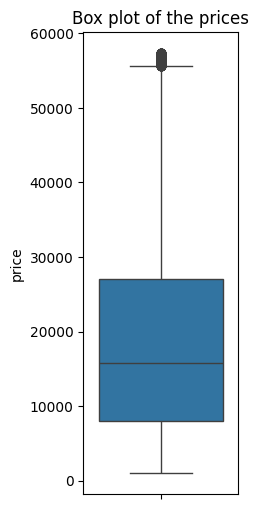

In [42]:
fig, ax = plt.subplots(figsize=(2,6))
ax.set_title('Box plot of the prices')
sns.boxplot(data=df['price'])

#Checking outliers in the odometer column

Maximum Price: 10000000.0
Minimum Price: 0.0


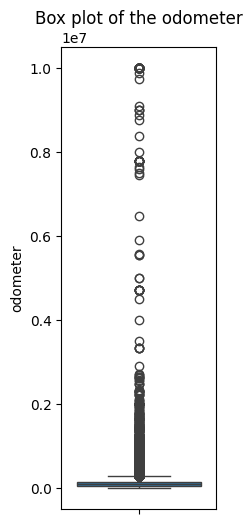

In [43]:

fig, ax = plt.subplots(figsize=(2,6))
ax.set_title('Box plot of the odometer')
sns.boxplot(data=df['odometer'])
# ouliers are there

print("Maximum Price:", df['odometer'].max())
print("Minimum Price:", df['odometer'].min())


The outliers in odometer can be due to two reasons:

1. Mistakes in the samples 
2. Most of the used cars have relatively low mileage, which lower the median, while some other cars actally run that far.

We remove these outliers using the same method as above. 

Extremly small odometer is reasonable, as they tend to be new cars.
The upper threshold is set to be higher, accepting more samples.

In [44]:
Q1 = df['odometer'].quantile(0.25)
Q3= df['odometer'].quantile(0.75)
IQR_od = Q3 - Q1

upper_bound_od = Q3 + 3 * IQR_od

df= df[df['odometer'] <= upper_bound_od]

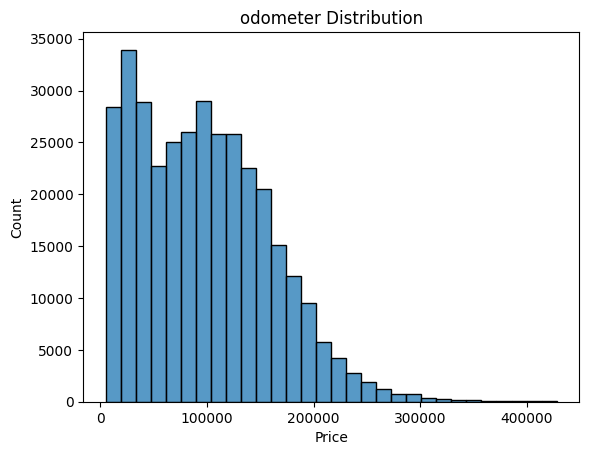

In [45]:
df= df[(df['odometer'] >5000) & (df['year'] > 1990)]
sns.histplot(df['odometer'], bins=30, kde=False)
plt.title("odometer Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

#Keep only relevant columns and remove irrelevant columns from the dataframe

In [46]:

df = df[['price', 'year', 'odometer', 'manufacturer', 'fuel',
         'transmission', 'drive', 'type', 'paint_color', 'condition', 'cylinders']]
df.tail()

,price,year,odometer,manufacturer,fuel,transmission,drive,type,paint_color,condition,cylinders
426874,33590,2018.0,30814.0,lexus,gas,automatic,rwd,sedan,white,good,6 cylinders
426875,23590,2019.0,32226.0,nissan,gas,other,fwd,sedan,NaN,good,6 cylinders
426876,30590,2020.0,12029.0,volvo,gas,other,fwd,sedan,red,good,NaN
426878,28990,2018.0,30112.0,lexus,gas,other,fwd,sedan,silver,good,6 cylinders
426879,30590,2019.0,22716.0,bmw,gas,other,rwd,coupe,NaN,good,NaN


In [47]:
#Check for missing values in the dataframe
df.isnull().sum()
#Drop the missing/ NaN values
df = df.dropna()
# # Reset index
df.reset_index(drop=True, inplace=True)
df.head()

,price,year,odometer,manufacturer,fuel,transmission,drive,type,paint_color,condition,cylinders
0,15000,2013.0,128000.0,ford,gas,automatic,rwd,truck,black,excellent,6 cylinders
1,27990,2012.0,68696.0,gmc,gas,other,4wd,pickup,black,good,8 cylinders
2,34590,2016.0,29499.0,chevrolet,gas,other,4wd,pickup,silver,good,6 cylinders
3,35000,2019.0,43000.0,toyota,gas,automatic,4wd,truck,grey,excellent,6 cylinders
4,29990,2016.0,17302.0,chevrolet,gas,other,4wd,pickup,red,good,6 cylinders


Box plot of each feature vs price

<Axes: xlabel='condition', ylabel='price'>

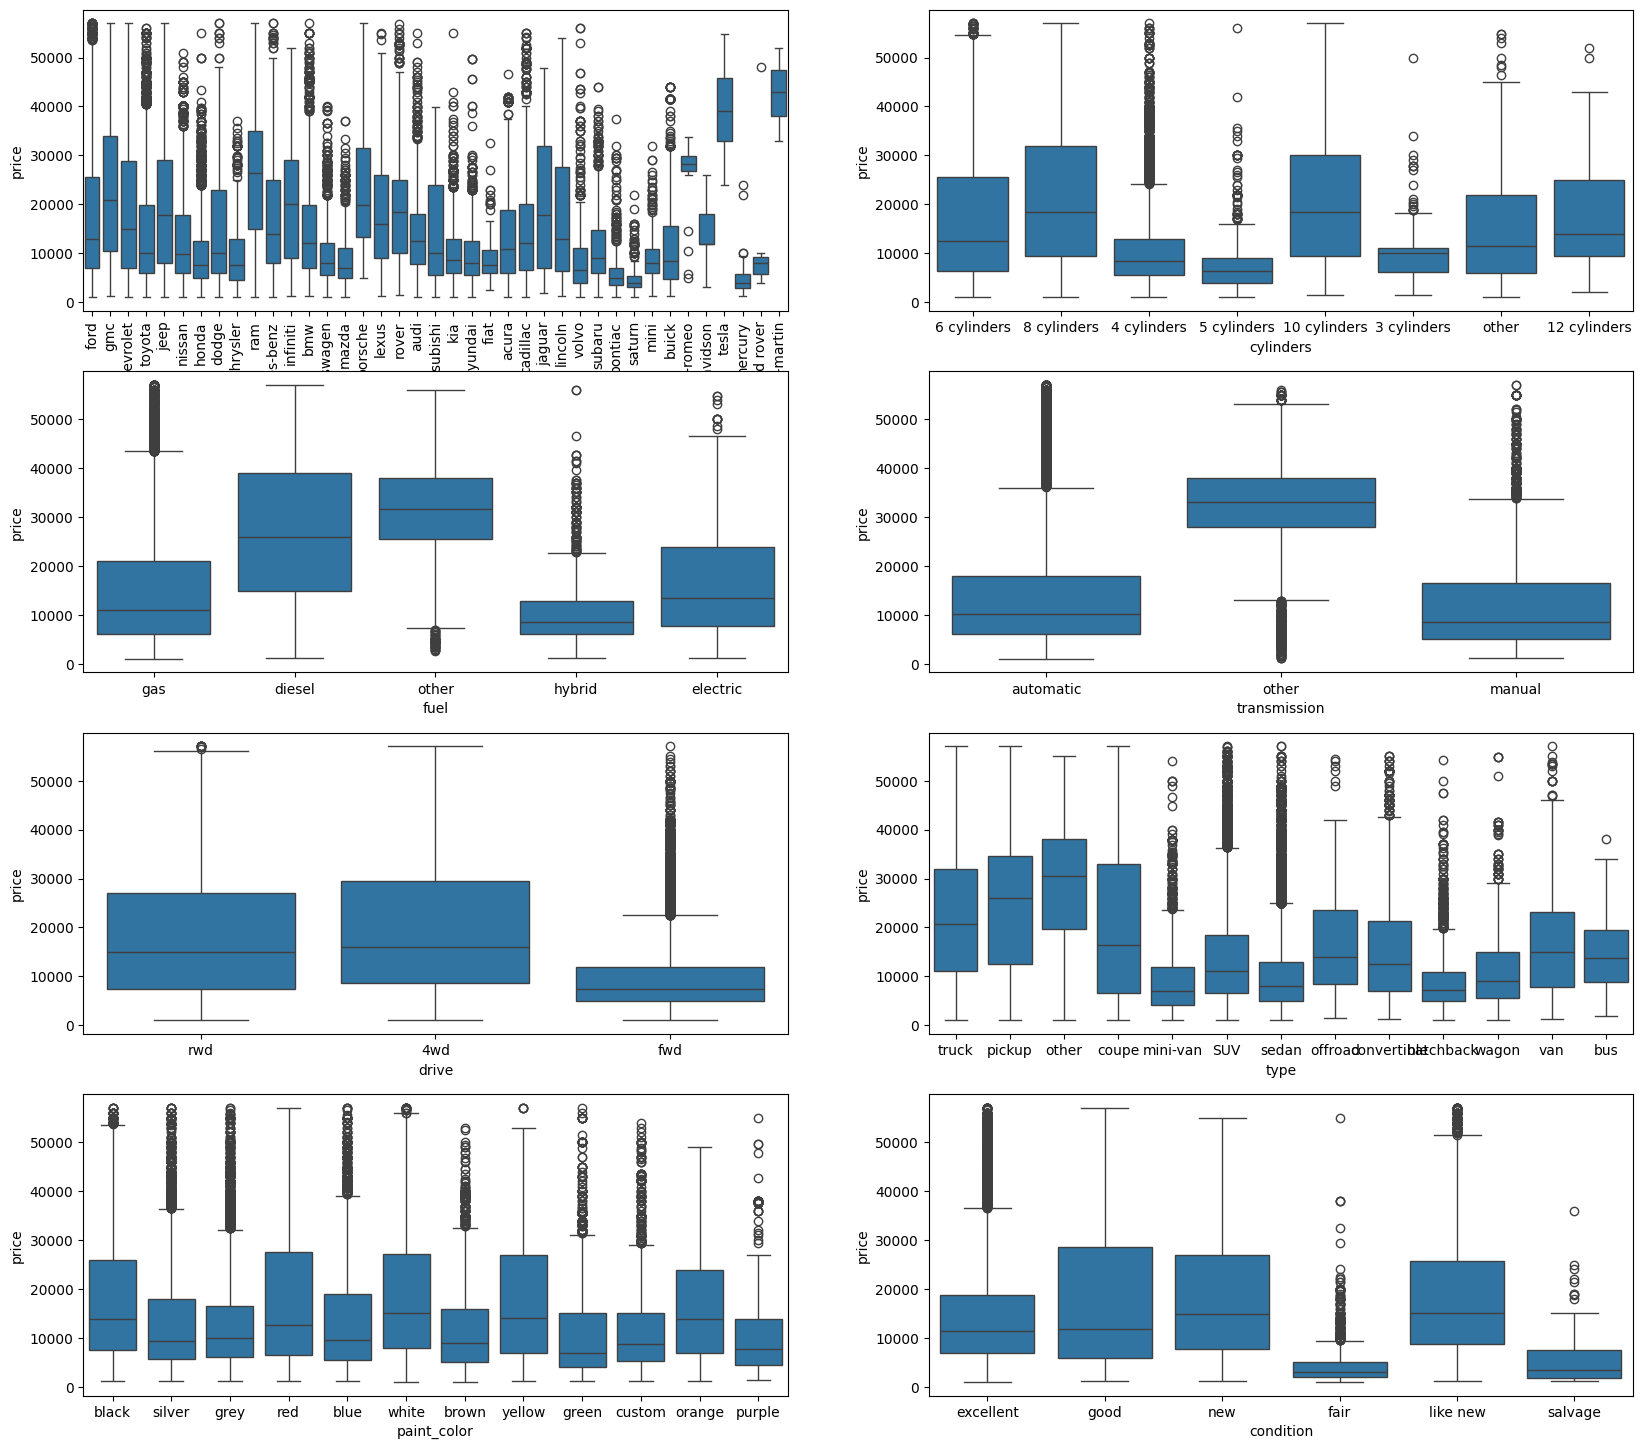

In [48]:
fig=plt.figure(figsize=(20,18))
fig.add_subplot(4, 2, 1)
 
sns.boxplot(x='manufacturer', y='price', data = df)
plt.xticks(rotation=90)
fig.add_subplot(4, 2, 2)
sns.boxplot(x='cylinders', y='price', data = df)
fig.add_subplot(4, 2, 3)
sns.boxplot(x='fuel', y='price', data = df)
fig.add_subplot(4, 2, 4)
sns.boxplot(x='transmission', y='price', data = df)
fig.add_subplot(4, 2, 5)
sns.boxplot(x='drive', y='price', data = df)
fig.add_subplot(4, 2, 6)
sns.boxplot(x='type', y='price', data = df)
fig.add_subplot(4, 2, 7)
sns.boxplot(x='paint_color', y='price', data = df)
fig.add_subplot(4, 2, 8)
sns.boxplot(x='condition', y='price', data = df)


Now let us check the different unique types available in each category. For eg: Under fuel : 'gas' 'diesel' 'other' 'hybrid' 'electric'

In [49]:
def get_unique_classes(df, columns):            # return unique values for given column
    for col in columns:
        print(f'unique classes of {col} are {df[col].unique()}')
        print(f'Number of types of {col} are {df[col].nunique()}')

categories=['price','year',	'manufacturer',	'condition','cylinders','fuel','odometer','transmission','drive','type','paint_color']
get_unique_classes(df, categories)


unique classes of price are [15000 27990 34590 ... 12589  3670 27294]
Number of types of price are 4618
unique classes of year are [2013. 2012. 2016. 2019. 2011. 2017. 2018. 2004. 2001. 2014. 2003. 2008.
 2007. 2020. 2006. 2005. 2010. 2009. 2002. 1995. 1996. 1994. 2015. 2000.
 1998. 1991. 1997. 1993. 1999. 1992. 2021. 2022.]
Number of types of year are 32
unique classes of manufacturer are ['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'honda' 'dodge'
 'chrysler' 'ram' 'mercedes-benz' 'infiniti' 'bmw' 'volkswagen' 'mazda'
 'porsche' 'lexus' 'rover' 'audi' 'mitsubishi' 'kia' 'hyundai' 'fiat'
 'acura' 'cadillac' 'jaguar' 'lincoln' 'volvo' 'subaru' 'pontiac' 'saturn'
 'mini' 'buick' 'alfa-romeo' 'harley-davidson' 'tesla' 'mercury'
 'land rover' 'aston-martin']
Number of types of manufacturer are 39
unique classes of condition are ['excellent' 'good' 'new' 'fair' 'like new' 'salvage']
Number of types of condition are 6
unique classes of cylinders are ['6 cylinders' '8 cylinders' '4 cyl


To find the impact of different features on car prices, we need to group them by categories

Grouping can be done by choosing mean or median

If the distribution of car prices is symmetric, we use mean
If there are outliers (i.e distribution is skew symmetric), we use median

The above price distribution is skewed.  Hence let us use median to group the car prices based on different categories. 

This can also be checked by calculating the skewness value
If skewness1 is close to 1, skewed distribution ---> use median
If skewness is between -0.5 and 0.5, symmetric distribution ---> use mean

In [50]:
print("Skewness of price:", df['price'].skew()) 

Skewness of price: 1.0179198821086444


Skewness close to 1 , Hence group using median 

In [51]:

avg_prices_year = df.groupby("year")["price"].median().sort_values()
avg_prices_manufacturer = df.groupby("manufacturer")["price"].median().sort_values()
avg_prices_condition = df.groupby("condition")["price"].median().sort_values()
avg_prices_cylinders = df.groupby("cylinders")["price"].median().sort_values()
avg_prices_fuel_type = df.groupby("fuel")["price"].median().sort_values()
# avg_prices_odometer = df.groupby("odometer")["price"].median().sort_values()
avg_prices_transmission = df.groupby("transmission")["price"].median().sort_values()
avg_prices_drive = df.groupby("drive")["price"].median().sort_values()
avg_prices_type = df.groupby("type")["price"].median().sort_values()
avg_prices_paint_color = df.groupby("paint_color")["price"].median().sort_values()



Understanding the impact of categories on Car prices

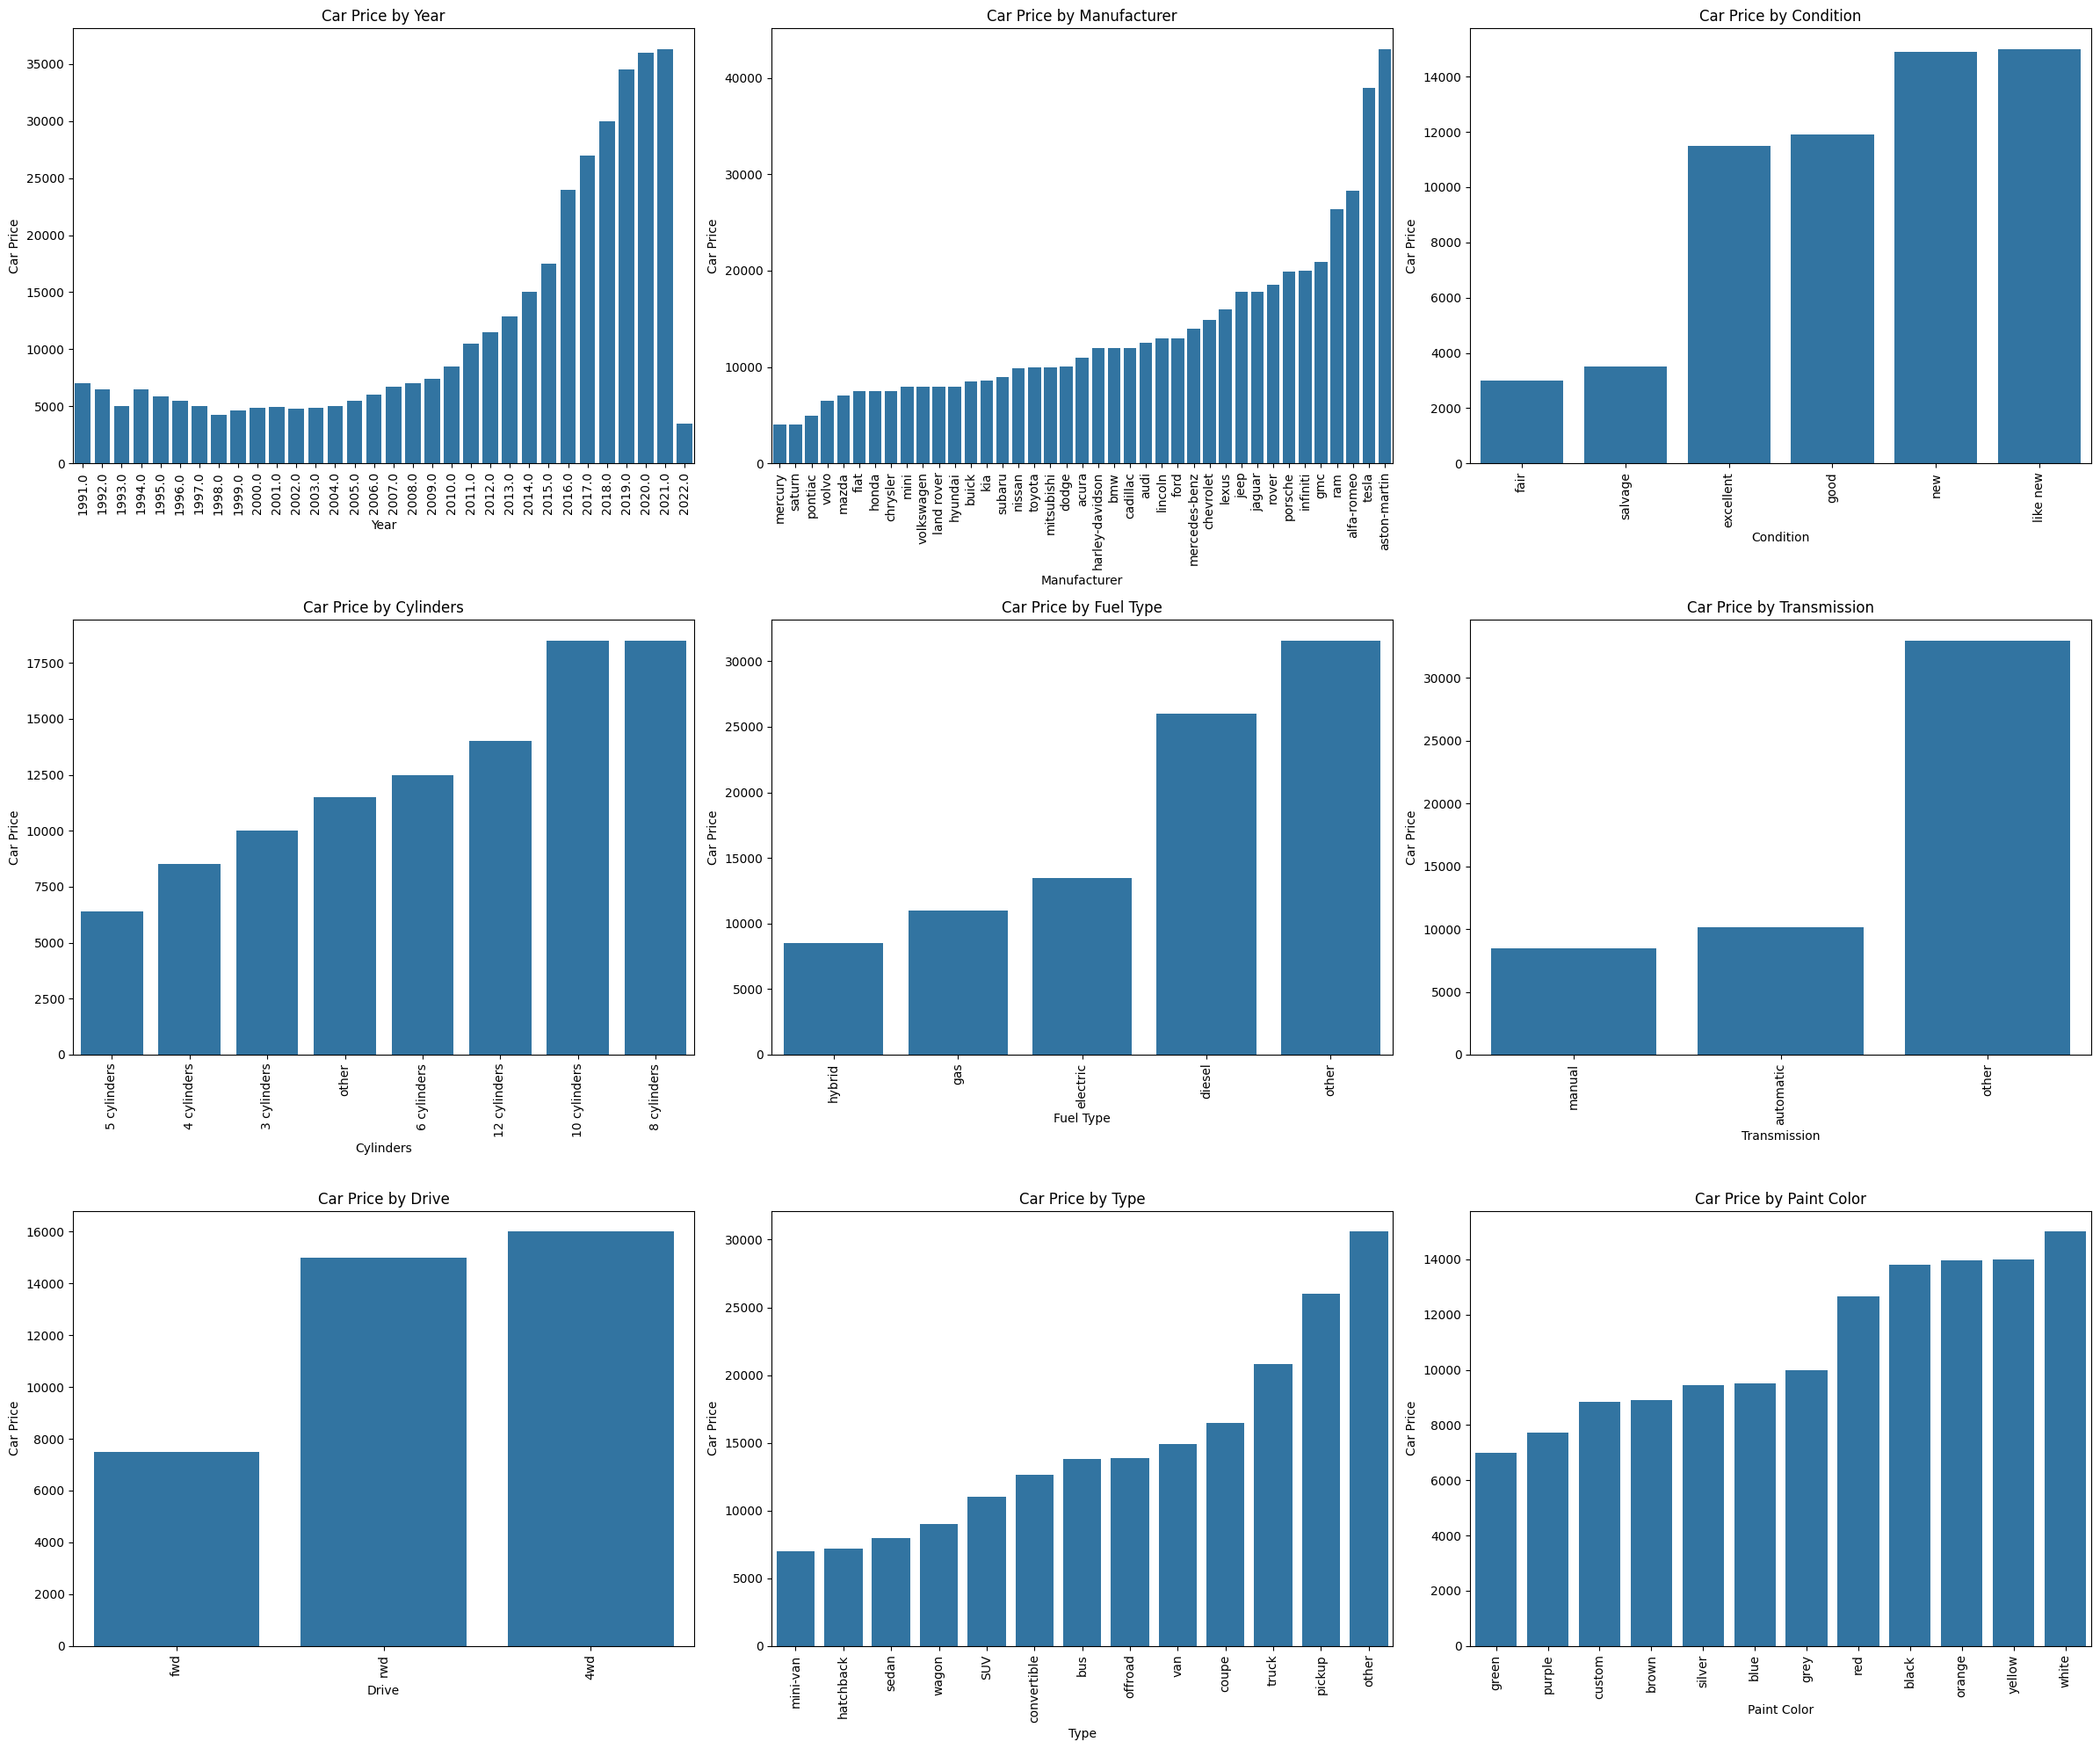

In [52]:
# List of (series, title) pairs for convenience
grouped_data = [
    (avg_prices_year, 'Year'),
    (avg_prices_manufacturer, 'Manufacturer'),
    (avg_prices_condition, 'Condition'),
    (avg_prices_cylinders, 'Cylinders'),
    (avg_prices_fuel_type, 'Fuel Type'),
    # (avg_prices_odometer, 'Odometer'),
    (avg_prices_transmission, 'Transmission'),
    (avg_prices_drive, 'Drive'),
    (avg_prices_type, 'Type'),
    (avg_prices_paint_color, 'Paint Color')
]

fig, axes = plt.subplots(3, 3, figsize=(24, 20))
axes = axes.flatten()

for i, (series, title) in enumerate(grouped_data):
    data = series.reset_index()
    x_col = data.columns[0]
    y_col = data.columns[1]
    
    sns.barplot(x=x_col, y=y_col, data=data, ax=axes[i])
    axes[i].set_title(f'Car Price by {title}')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Car Price')
    axes[i].tick_params(axis='x', rotation=90)
    
plt.tight_layout()
plt.show()

What are the inferences from the plot?
1. Drive: Vehicles with 4WD systems are more expensive to purchase and maintain in the U.S. compared to RWD and FWD vehicles due to their increased mechanical complexity.
   front-wheel drive (FWD), rear-wheel drive (RWD), four-wheel drive (4WD)
2. Condition : The average price of used cars in the U.S. decreases as the condition deteriorates from 'new' to 'fair', with 'new' cars having the highest prices and 'fair' cars the lowest 
Salvage cars should have lower prices than fair cars because of their severe damage history and higher risk. But here, you're observing salvage cars priced higher than fair. 

   This may be due the following conditions:
         a) Some salvage cars have been professionally repaired and look almost like new. Sellers might price them higher based on visual appeal, added features, or low mileage.   
         b) A newer or luxury vehicle with a salvage title might still cost more than an older economy car in fair condition.    
         c) Mistakes in listings or data entry (e.g., incorrect labeling of the condition).     
         d) Some sellers may mark a car as salvage when it’s not officially titled as such, just to indicate minor damage or repairs, which confuses the comparison.    
3. Transmission: Manual transmission cras are typically cheaper than automatic cars . 'Others' may refer to CVT (Continuously Variable Transmission), dual-clutch, or semi-automatic transmissions, often found in hybrids,   
   electric vehicles, or luxury/sport models, and usually more expensive. 

4. Fuel type:  In the U.S. used car market, vehicles powered by hybrid engines tend to have lower prices on average than gas, electric, diesel, and other fuel types, with 'other' being the most expensive.  
hybrid < gas < electric < diesel < other
         a) Hybrid – Often affordable due to older models entering the used market and concerns about battery life.
         b) Gas – Most common; prices vary widely but generally mid-range.
         c) Electric – Newer technology, higher initial cost; some depreciation but still priced above gas/hybrids.
         d) Diesel – Fewer models, often trucks/SUVs; more expensive due to power and efficiency.
         e) Other – Could include hydrogen, natural gas, or exotic engines (rare and possibly luxury or specialty), thus higher priced.

5.  Cylinders: In the U.S. used car market, vehicles with 5-cylinder engines generally have lower average prices than those with 4- and 6-cylinder engines, while cars with higher cylinder counts (8, 10, 12) tend to be more expensive due to increased performance and luxury features."        



In [53]:
df.head()

,price,year,odometer,manufacturer,fuel,transmission,drive,type,paint_color,condition,cylinders
0,15000,2013.0,128000.0,ford,gas,automatic,rwd,truck,black,excellent,6 cylinders
1,27990,2012.0,68696.0,gmc,gas,other,4wd,pickup,black,good,8 cylinders
2,34590,2016.0,29499.0,chevrolet,gas,other,4wd,pickup,silver,good,6 cylinders
3,35000,2019.0,43000.0,toyota,gas,automatic,4wd,truck,grey,excellent,6 cylinders
4,29990,2016.0,17302.0,chevrolet,gas,other,4wd,pickup,red,good,6 cylinders


**3. Normalization**

We need to normalize the values in the numerical features ("year" and "odometer"), as they do not have the same scale as the other columns. 
To bring the features to a common scale/range, we use standardization.  
Here z-score standardisation is used (z score=(x-mean)/std). 

(Why standardisation and not normalization? --> Because our data is skew symmetric and have outliers. Hence standardisation may represent outliers as outliers and will not compress it to the range [0,1])

In [54]:
scaler = StandardScaler()
df[['year', 'odometer']] = scaler.fit_transform(df[['year', 'odometer']])

# scaler = StandardScaler()

# for column in ['year', 'odometer']:
#     df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

**4. Feature Engineering**

        Encode categorical columns with numerical values using one-hot encoding (usually used for Linear regression problems)

In [55]:
categorical_cols = ['manufacturer', 'condition','fuel','transmission', 'drive',
                    'type', 'paint_color','cylinders']
numeric_cols = ['year','odometer']

In [56]:
# Apply One-Hot Encoding

# for column in categorical_cols:
#     column = pd.get_dummies(df[column],drop_first=True)
#     df = pd.concat([df,column],axis=1)
# df_encoded = df.drop(columns = categorical_cols)


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [57]:
df_encoded

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_silver,paint_color_white,paint_color_yellow,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other
0,15000,0.397195,0.285815,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,27990,0.225922,-0.671320,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,34590,0.911017,-1.303940,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
3,35000,1.424838,-1.086040,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,29990,0.911017,-1.500793,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102224,48590,1.596111,-1.655748,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
102225,39990,1.082290,-1.107603,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
102226,32990,0.911017,-0.882489,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
102227,33590,1.253564,-1.282716,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


**5.  Exploratory Data Analysis (EDA)**

        Compute the correlation matrix to find the relationship between features and target

        (83 features)

In [58]:
corr_matrix = df_encoded.corr(numeric_only=True)

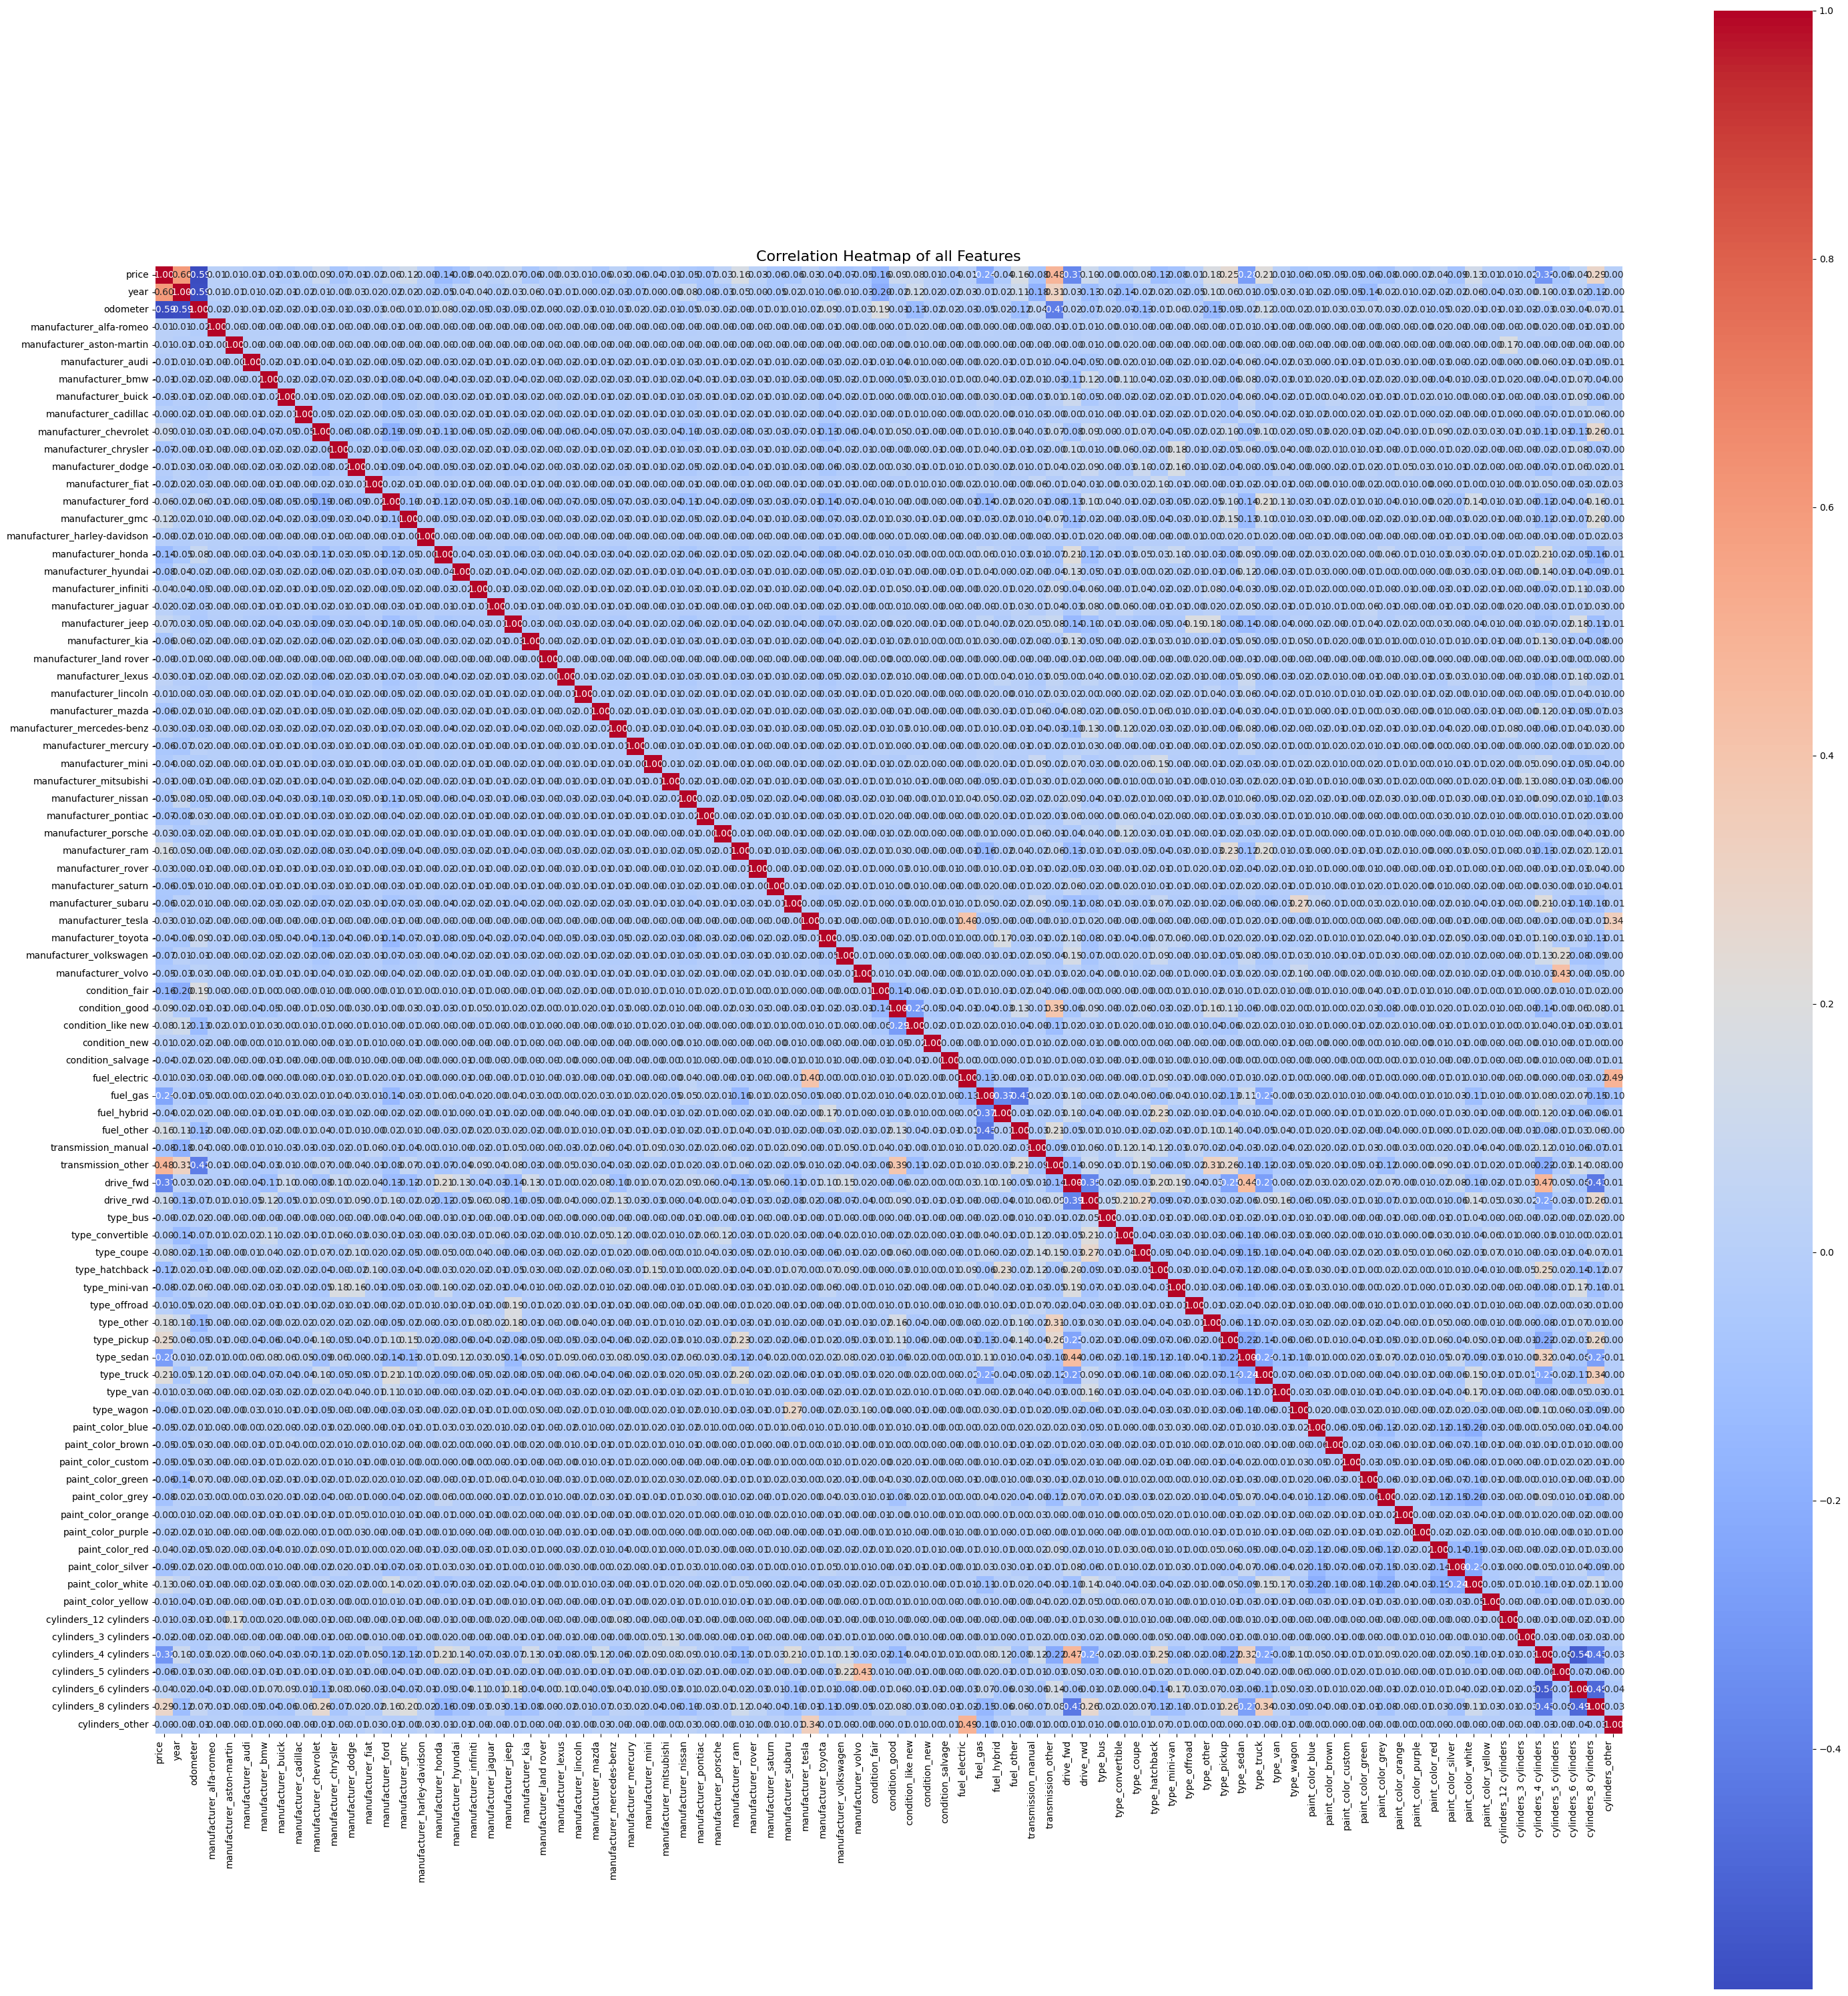

In [59]:
# Visualize the heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of all Features', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Around 83 features are there in the above correlation matrix.   

This below commented cell can be used to find the most correlated features (10 features).       
This can be used to perform dimensionality reduction
But this didn't reduce the mse much (MSE was around 6130 and R2 score was 0.73).        
If we focusing on getting better prediction using less features, this section can be added and these 10 selected features could be used for training the model


In [60]:
#Find the most correlated features

# price_corr = corr_matrix['price'].sort_values(ascending=False)
# print(price_corr)
# top_features = price_corr.abs().sort_values(ascending=False).head(11).index  # price + top 10
# plt.figure(figsize=(10, 8))
# sns.heatmap(df_encoded[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Top Features Correlated with Car Price')
# plt.show()




**6. Train/Test Split + Train Model**

In [61]:
y = df_encoded['price']
X=df_encoded.drop('price',axis=1)

# X = df_encoded[top_features.drop('price')] # This is used as feature set when we consider less number of features
# print(X.columns)
print(X.shape)

#Splitting to test and train set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RF regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


(102229, 83)


RandomForestRegressor(random_state=42)

**7. Test the model by predicting the car price of test data**

In [62]:
# Predict on the test set
y_pred_rf = rf_model.predict(x_test)

# Print some sample predictions
for i in range(7):
    print(f"Predicted car price: {y_pred_rf[i]:.4f} | Actual car price: {y_test.iloc[i]}")

Predicted car price: 10526.7756 | Actual car price: 10700
Predicted car price: 18995.0000 | Actual car price: 18995
Predicted car price: 9685.9900 | Actual car price: 9200
Predicted car price: 7999.0000 | Actual car price: 7999
Predicted car price: 26065.3300 | Actual car price: 28995
Predicted car price: 39252.5216 | Actual car price: 38990
Predicted car price: 9576.5700 | Actual car price: 11990


**8. Evaluating the model**

In [63]:
# Compute evaluation metrics

mse=mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("--------Prediction using Random Forest regressor-------")
print(f"✅ Mean Squared Error: {mse:2f}")
print(f"✅ Root Mean Squared Error: {rmse:2f}")
print(f"✅ R²-Score : {r2:2f}")




--------Prediction using Random Forest regressor-------
✅ Mean Squared Error: 11270922.371475
✅ Root Mean Squared Error: 3357.219440
✅ R²-Score : 0.919854


Plot the actual and predicted car prices

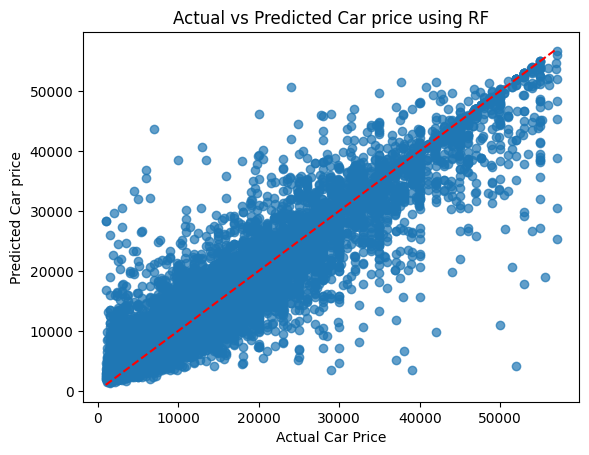

In [64]:
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car price')
plt.title('Actual vs Predicted Car price using RF')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

**9. Save the Trained Model (car_price_model.pkl)**

In [65]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'car_price_model.pkl')

['car_price_model.pkl']

Residual distribution

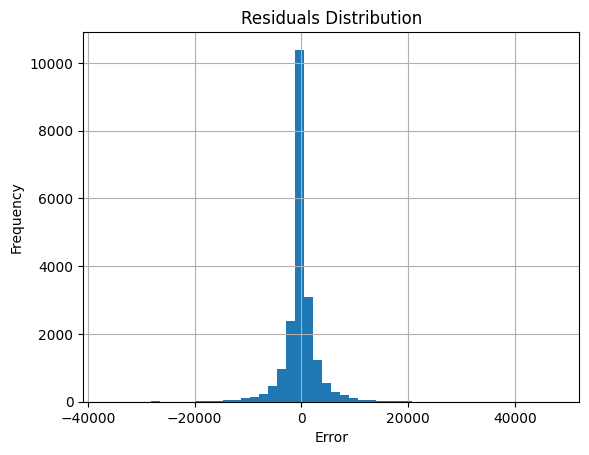

Train R²: 0.9892
Test R²:  0.9199


In [66]:

residuals = y_test - y_pred_rf
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

train_pred = rf_model.predict(x_train)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, y_pred_rf)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")